## About Practice Problem : Identify the Apparels
More than 25% of entire revenue in E-Commerce is attributed to apparels & accessories. A major problem they face is categorizing these apparels from just the images especially when the categories provided by the brands are inconsistent. This poses an interesting computer vision problem which has caught the eyes of several deep learning researchers.

Fashion MNIST is a drop-in replacement for the very well known, machine learning hello world - MNIST dataset which can be checked out at ‘Identify the digits’ practice problem. Instead of digits, the images show a type of apparel e.g. T-shirt, trousers, bag, etc. The dataset used in this problem was created by Zalando Research. More details can be found at this link.

Data Science Resources
To get started with deep learning/computer vision, enroll for the online course 'Computer Vision for Deep Learning'  at our trainings platform
Are you a beginner? If yes, you can check out our latest 'Intro to Data Science' course to kickstart your journey in data science.

#### Rules
- One person cannot participate with more than one user accounts.
- You are free to use any tool and machine you have rightful access to.
- You can use any programming language or statistical software.
- You are free to use solution checker as many times as you want.

#### FAQs
1.  Are there any prizes/AV Points for this contest?

This contest is purely for learning and practicing purpose and hence no participant is eligible for prize or AV points.

2. Can I share my approach/code?

Absolutely. You are encouraged to share your approach and code file with the community. There is even a facility at the leaderboard to share the link to your code/solution description.

3. I am facing a technical issue with the platform/have a doubt regarding the problem statement. Where can I get support?

Post your query on discussion forum at the thread for this problem, discussion threads are given at the bottom of this page. You could also join the AV slack channel by clicking on 'Join Slack Live Chat' button and ask your query at channel: practice_problems.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

import cv2
import os

Using TensorFlow backend.


In [2]:
import pandas as pd

In [3]:
# Import train and test images
# Get datasets from https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-apparels/#ProblemStatement

train=pd.read_csv('/Users/Akshara/Apparel/train/train.csv')
test=pd.read_csv('/Users/Akshara/Apparel/test/test.csv')

In [4]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [5]:
# Import train and test images
train_img_path='/Users/Akshara/Apparel/train/train/'
test_img_path='/Users/Akshara/Apparel/test/test/'

train_img=[]

for i in train['id'].astype('str'):
    train_img.append(cv2.imread(os.path.join(train_img_path,i+".png"),0))
    
test_img=[]
for i in test['id'].astype('str'):
    test_img.append(cv2.imread(os.path.join(test_img_path,i+".png"),0))

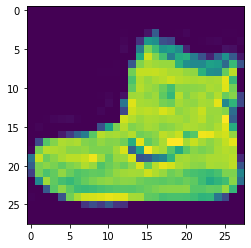

In [6]:
plt.imshow(train_img[0])

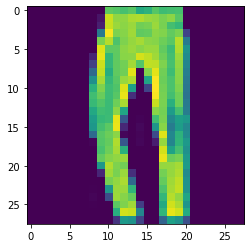

In [7]:
plt.imshow(test_img[5])

In [8]:
train_img = np.array(train_img)
test_img = np.array(test_img)

In [9]:
train_img.shape[0]

60000

In [10]:
test_img.shape[0]

10000

In [11]:
X_data = train_img.reshape((train_img.shape[0],train_img.shape[1],
                          train_img.shape[2], 1))

In [12]:
X_data.shape

(60000, 28, 28, 1)

In [13]:
Y_data = test_img.reshape((test_img.shape[0],test_img.shape[1],
                          test_img.shape[2], 1))

In [14]:
Y_data.shape

(10000, 28, 28, 1)

In [15]:
y=train['label']
y=to_categorical(y)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y,test_size = 0.3,random_state=777)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 28, 28, 1)
(18000, 28, 28, 1)
(42000, 10)
(18000, 10)


### Model 1: Simple CNN

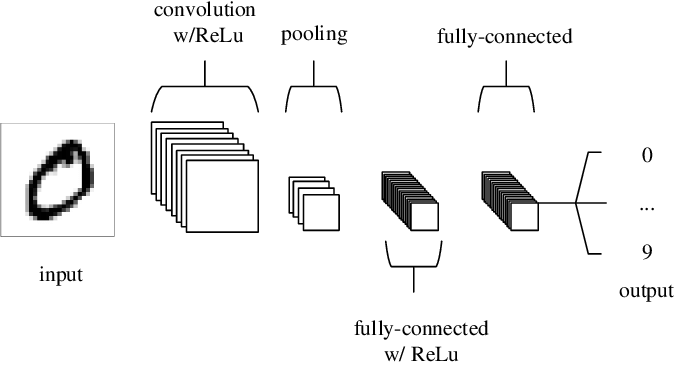

In [19]:
#creating the model
model = Sequential()

In [20]:
# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

In [21]:
#activation layer
model.add(Activation('relu'))

In [22]:
#pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

In [23]:
# prior layer should be flattend to be connected to dense layers
model.add(Flatten())

In [24]:
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))

In [25]:
# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))

In [26]:
#compile and train
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                84550     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 85,160
Trainable params: 85,160
Non-trainable params: 0
__________________________________________________

In [28]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)


Wall time: 15min 42s


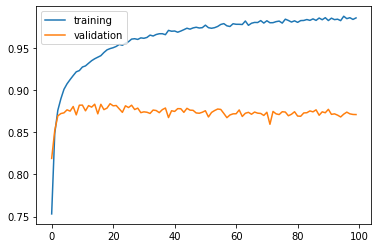

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [30]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 106us/step


In [31]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8736666440963745


In [33]:
pred_test = model.predict(Y_data)

In [34]:
pred_test[1091]

array([5.3192094e-17, 1.0000000e+00, 1.9184318e-23, 3.0422883e-11,
       2.3524427e-21, 3.3941143e-21, 2.9880855e-08, 2.2502757e-33,
       1.1715227e-26, 1.8572821e-22], dtype=float32)

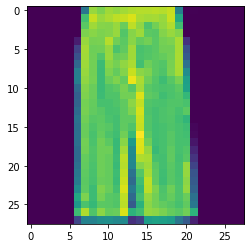

In [35]:
plt.imshow(test_img.reshape(10000,28,28)[1091])

In [36]:
test.iloc[1091]

id    61092
Name: 1091, dtype: int64

### Model 2: Simple CNN with slight variation
changes in filter and padding

In [37]:
model = Sequential()
model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
# prior layer should be flattend to be connected to dense layers
model.add(Flatten())
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))
# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))
    
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                490050    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 491,060
Trainable params: 491,060
Non-trainable params: 0
________________________________________________

In [39]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 44min


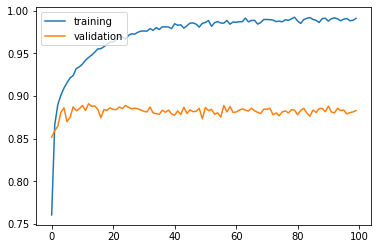

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [41]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 4s 245us/step


In [42]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8849444389343262


### Model 3 Deep CNN 1
- Deeper network with 6 convolutional layers and 3 pooling layers
- Note that two (3x3) convolutional layers are stacked
- It is equivalent to using one (5X5) convolutional layer, but with fewer parameters
- Similar to the structured used in VGGnet

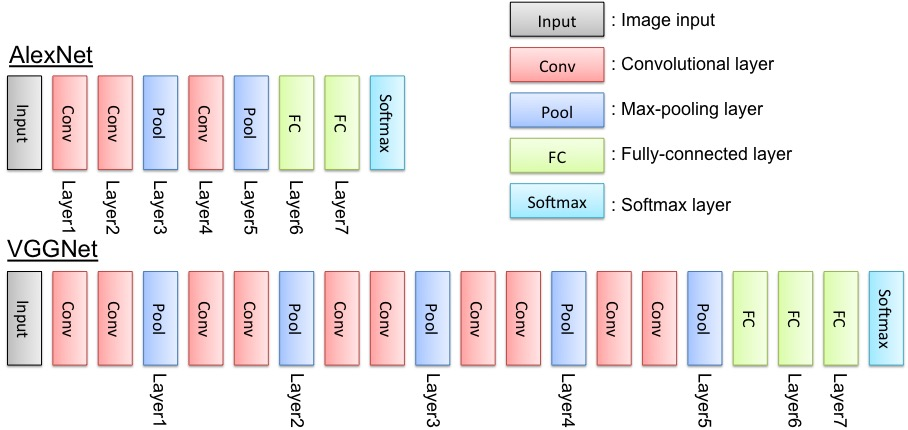

In [43]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [44]:
model = deep_cnn()

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 50)       

In [46]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 4h 37min 25s


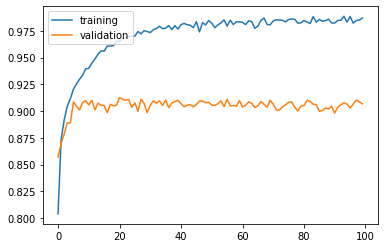

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [48]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 23s 1ms/step


In [49]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9115555286407471


### Deep CNN - 2
Measures used to ameliorate the performance of MLPs are employed
Weight Initialization
Batch Normalization
Dropout

In [50]:
from keras.layers import BatchNormalization, Dropout

In [51]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [52]:
model = deep_cnn_advanced()

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 50)       

In [54]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 13h 11min 20s


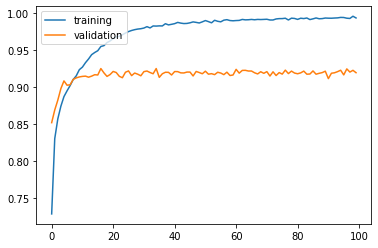

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [56]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 74s 4ms/step


In [57]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9261666536331177


In [59]:
#Making prediction
prediction = model.predict_classes(Y_data)

In [61]:
# creating submission file
sample = pd.read_csv('/Users/Akshara/Apparel/sample_submission_I5njJSF.csv')
sample['label'] = prediction
sample.to_csv('/Users/Akshara/Apparel/sample_final.csv', header=True, index=False)